# Discharge at Igarka

# Chemicals at Dudinka

- https://arcticdata.io/catalog/view/urn%3Auuid%3Ac43f34bf-e4e3-4031-b610-8419753d00b1

In [1]:
# Increase width of the cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data')
print(os.getcwd())
import numpy as np
import pandas as pd
pd.set_option('mode.use_inf_as_na', True)

# Plotting (x,y) with MatPlotLib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
plt.style.use("seaborn-poster") # notebook, paper, poster
# Plotting Tick Marks # https://matplotlib.org/stable/api/ticker_api.html
import matplotlib.ticker as mticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import AutoMinorLocator

# Plotting (x(t),y(t))
import datetime
from datetime import timedelta
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
years  =  mdates.YearLocator()
months =  mdates.MonthLocator()
days   =  mdates.DayLocator()
year_name = DateFormatter("%Y")
month_name = DateFormatter("%b")
day_name = DateFormatter('%d')

# Statistics/Regression Models (SciPy)
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, Data, RealData

# Prohibit Warnings ()
import warnings 
warnings.filterwarnings('ignore')
#warnings.filterwarnings("error", message=".*check_inverse*.",category=UserWarning, append=False)
###################################################################################################

J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data


In [2]:
def summarize_dataframe(df):
    summary = df.describe()
    return summary.loc[['min', 'max', 'mean']].T.round(3)

# Discharge

In [3]:
# Name File
AGRO4_Q = 'Arctic_GRO4_Discharge.txt'

# Import File (.txt)
dfq = pd.read_csv(AGRO4_Q, delim_whitespace=True, parse_dates=[0], index_col=[0], na_values = {'NA','A','', 'P'})

# Remove excess spaces from Column Text
dfq.columns = dfq.columns.str.strip()

# Yenisey River 
dfq= dfq.drop(columns={'Yukon','Yukon_flag',
                       'Mackenzie','Mackenzie_flag',
                       'Ob_flag',
                       'Lena_flag',
                       'Kolyma_flag',
                       'Yenisey_flag'})
# Rename Discharge Column
dfq = dfq.rename(columns={"Ob":"oq_m3/s",
                          "Yenisey":"yq_m3/s",  
                          "Lena":"lq_m3/s",
                          "Kolyma":"kq_m3/s"})

# Perform interpolation
dfq = dfq.interpolate(method='piecewise_polynomial', order=6)

# Convert from [m3/s] to [km3/s]
dfq['oq_km3/y'] = (dfq['oq_m3/s']) * (1/(10**9)) * (86400) * (365) 
dfq['yq_km3/y'] = (dfq['yq_m3/s']) * (1/(10**9)) * (86400) * (365) 
dfq['lq_km3/y'] = (dfq['lq_m3/s']) * (1/(10**9)) * (86400) * (365) 
dfq['kq_km3/y'] = (dfq['kq_m3/s']) * (1/(10**9)) * (86400) * (365) 

# Convert Volume Export to Mass Export (Assume FW Density = 999.82 [kg/m3])
dfq['om_kg/y'] = ((dfq['oq_m3/s']) * (999.82) ) * (86400) * (365) 
dfq['ym_kg/y'] = ((dfq['yq_m3/s']) * (999.82) ) * (86400) * (365) 
dfq['lm_kg/y'] = ((dfq['lq_m3/s']) * (999.82) ) * (86400) * (365) 
dfq['km_kg/y'] = ((dfq['kq_m3/s']) * (999.82) ) * (86400) * (365) 

# 1 Pg = 10**12 kg
dfq['om_Pg/y'] = (dfq['om_kg/y']) * (10**-12)
dfq['ym_Pg/y'] = (dfq['ym_kg/y']) * (10**-12)
dfq['lm_Pg/y'] = (dfq['lm_kg/y']) * (10**-12)
dfq['km_Pg/y'] = (dfq['km_kg/y']) * (10**-12)

# Truncate 2022 Data for Annual Interpretations
#dfq = dfq.truncate(after='2021-12-31') 

# Preview
dfq.head(3)

oq_m3/s  yq_m3/s  lq_m3/s  kq_m3/s   oq_km3/y  yq_km3/y  \
Date                                                                  
1999-01-01   5720.0   9700.0   3360.0    322.0  180.38592  305.8992   
1999-01-02   5680.0   9750.0   3390.0    328.0  179.12448  307.4760   
1999-01-03   5630.0   9800.0   3420.0    328.0  177.54768  309.0528   

             lq_km3/y   kq_km3/y       om_kg/y       ym_kg/y       lm_kg/y  \
Date                                                                         
1999-01-01  105.96096  10.154592  1.803535e+14  3.058441e+14  1.059419e+14   
1999-01-02  106.90704  10.343808  1.790922e+14  3.074207e+14  1.068878e+14   
1999-01-03  107.85312  10.343808  1.775157e+14  3.089972e+14  1.078337e+14   

                 km_kg/y     om_Pg/y     ym_Pg/y     lm_Pg/y    km_Pg/y  
Date                                                                     
1999-01-01  1.015276e+13  180.353451  305.844138  105.941887  10.152764  
1999-01-02  1.034195e+13  179.092238  307.420654  106.887797  10.341946  
1999-01-03  1.034195e+13  177.515721  308.997170  107.833706  10.341946

# Chemistry

In [4]:
###############################################################################################
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data')
###############################################################################################
# Import ARCTICGRO4
AGRO4 = 'Arctic_GRO4_Chem.txt'
df4 = pd.read_csv(AGRO4, delim_whitespace=True, parse_dates=[1], na_values = {'NA','BD','','bdl'})
df4.columns = df4.columns.str.strip()
# Remove Apostraphe from Ob
df4['River'] = df4['River'].astype(str).str.replace("[']", "", regex=True)
df4.index = df4['River']
df4 = df4.rename(columns={"Temp":"T"})
###############################################################################################
# Reformat Dates
df4['year'] = pd.DatetimeIndex(df4['Date']).year
df4['month'] = pd.DatetimeIndex(df4['Date']).month
df4['day'] = pd.DatetimeIndex(df4['Date']).day
df4['month_day'] = df4['Date'].dt.strftime('%m-%d')
df4['month_day'] = pd.to_datetime(df4['month_day'],format='%m-%d',errors='coerce')
df4['month_'] = df4['Date'].dt.strftime('%m')
df4['month_'] = pd.to_datetime(df4['month_'],format='%m',errors='coerce')
df4 = df4.sort_values(by = ['month_','year'])
###############################################################################################
# Add Total Organic Carbon
df4['TOC'] = df4['DOC'] + df4['POC']

# Convert NO3 dtype from object to numeric
df4['NO3'] = pd.to_numeric(df4['NO3'])
df4['NH4'] = pd.to_numeric(df4['NH4'])

# Organic Ratios
df4['NP'] = df4['NO3']/df4['PO4']
df4['DOC_POC'] = df4['DOC']/df4['POC']

# Geochemical Ratios
df4['camg_alk'] = (df4['Ca'] + df4['Mg'])/df4['Alk']
df4['camg_so4'] = (df4['Ca'] + df4['Mg'])/df4['SO4']
df4['camg_no3'] = (df4['Ca'] + df4['Mg'])/df4['NO3']
df4['acid_alk'] = (df4['NO3'] + df4['SO4'])/df4['Alk']
###############################################################################################

In [5]:
# mgCaCO3/L to uM
CaCO3 = (40.078 + (12.011) + 3*(15.999))*1000
density = 998
L_m3 = 1000
df4['Alk_uM'] = df4['Alk'] * (1/ CaCO3) * (10**6) * (L_m3) * (1/density)

In [6]:
# Isolate Yenisey River Data
dfo = df4[df4.index == 'Ob']
dfy = df4[df4.index == 'Yenisey']
dfl = df4[df4.index == 'Lena']
dfk = df4[df4.index == 'Kolyma']

dfo.index = dfo['Date']
dfy.index = dfy['Date']
dfl.index = dfl['Date']
dfk.index = dfk['Date']

dfo = dfo.sort_values(by = ['year', 'month', 'day']) 
dfy = dfy.sort_values(by = ['year', 'month', 'day']) 
dfl = dfl.sort_values(by = ['year', 'month', 'day']) 
dfk = dfk.sort_values(by = ['year', 'month', 'day']) 
###############################################################################################
# For Scatter Plots
# Define three groups based on month_day values
oconditions = [dfo['month_day'].between('1900-01-01', '1900-05-19') | 
              dfo['month_day'].between('1900-12-01', '1900-12-31'),
              dfo['month_day'].between('1900-05-20', '1900-06-30'),
              dfo['month_day'].between('1900-07-01', '1900-11-30')]

# Define three groups based on month_day values
yconditions = [dfy['month_day'].between('1900-01-01', '1900-05-19') | 
              dfy['month_day'].between('1900-12-01', '1900-12-31'),
              dfy['month_day'].between('1900-05-20', '1900-06-30'),
              dfy['month_day'].between('1900-07-01', '1900-11-30')]

# Define three groups based on month_day values
lconditions = [dfl['month_day'].between('1900-01-01', '1900-05-19') | 
              dfl['month_day'].between('1900-12-01', '1900-12-31'),
              dfl['month_day'].between('1900-05-20', '1900-06-30'),
              dfl['month_day'].between('1900-07-01', '1900-11-30')]

# Define three groups based on month_day values
kconditions = [dfk['month_day'].between('1900-01-01', '1900-05-19') | 
              dfk['month_day'].between('1900-12-01', '1900-12-31'),
              dfk['month_day'].between('1900-05-20', '1900-06-30'),
              dfk['month_day'].between('1900-07-01', '1900-11-30')]

values = [0, 1, 2] # map numerical values to colors
colors = {0: 'blue', 1: 'red', 2: 'yellow'} # map numerical values to colors
labels = ['Dec-Apr', 'May-Jun', 'Jul-Nov'] # specify labels (months)

# Define the groups
dfo['season'] = np.select(oconditions, values)
dfy['season'] = np.select(yconditions, values)
dfl['season'] = np.select(lconditions, values)
dfk['season'] = np.select(kconditions, values)

# Merge

In [7]:
# River Discharge
oq = dfq['oq_m3/s']
yq = dfq['yq_m3/s']
lq = dfq['lq_m3/s']
kq = dfq['kq_m3/s']

# Merge Biogeochemical Parameters with Discharge Data
dfo = pd.merge(oq, dfo, left_index=True, right_index=True)
dfy = pd.merge(yq, dfy, left_index=True, right_index=True)
dfl = pd.merge(lq, dfl, left_index=True, right_index=True)
dfk = pd.merge(kq, dfk, left_index=True, right_index=True)

# Seasonal Shit

In [8]:
asd = pd.DataFrame()
asd = dfo
asd.index = asd['month_day']

df1o = pd.concat([asd.loc['1900-01-01':'1900-05-19'], asd.loc['1900-12-01':'1900-12-31']])
df2o = asd.loc['1900-05-20':'1900-06-30']
df3o = asd.loc['1900-07-01':'1900-11-30']

sdf = pd.DataFrame()
sdf = dfy
sdf.index = sdf['month_day']

df1y = pd.concat([sdf.loc['1900-01-01':'1900-05-19'], sdf.loc['1900-12-01':'1900-12-31']])
df2y = sdf.loc['1900-05-20':'1900-06-30']
df3y = sdf.loc['1900-07-01':'1900-11-30']

dfg = pd.DataFrame()
dfg = dfl
dfg.index = dfg['month_day']

df1l = pd.concat([dfg.loc['1900-01-01':'1900-05-19'], dfg.loc['1900-12-01':'1900-12-31']])
df2l = dfg.loc['1900-05-20':'1900-06-30']
df3l = dfg.loc['1900-07-01':'1900-11-30']

fgh = pd.DataFrame()
fgh = dfk
fgh.index = fgh['month_day']

df1k = pd.concat([fgh.loc['1900-01-01':'1900-05-19'], fgh.loc['1900-12-01':'1900-12-31']])
df2k = fgh.loc['1900-05-20':'1900-06-30']
df3k = fgh.loc['1900-07-01':'1900-11-30']

# Folder for Plot Images

In [9]:
# Working Directory (# Laptop @ J: ##### Desktop @ J:)
os.chdir('J:\Chomiak_Python\Chomiak_Notebooks\Siberia_Data\AGRO_Siberian_Bulk_Q_Regressions')

<br><br><br><br><br><br>

# Temperature

<br><br><br><br><br><br>

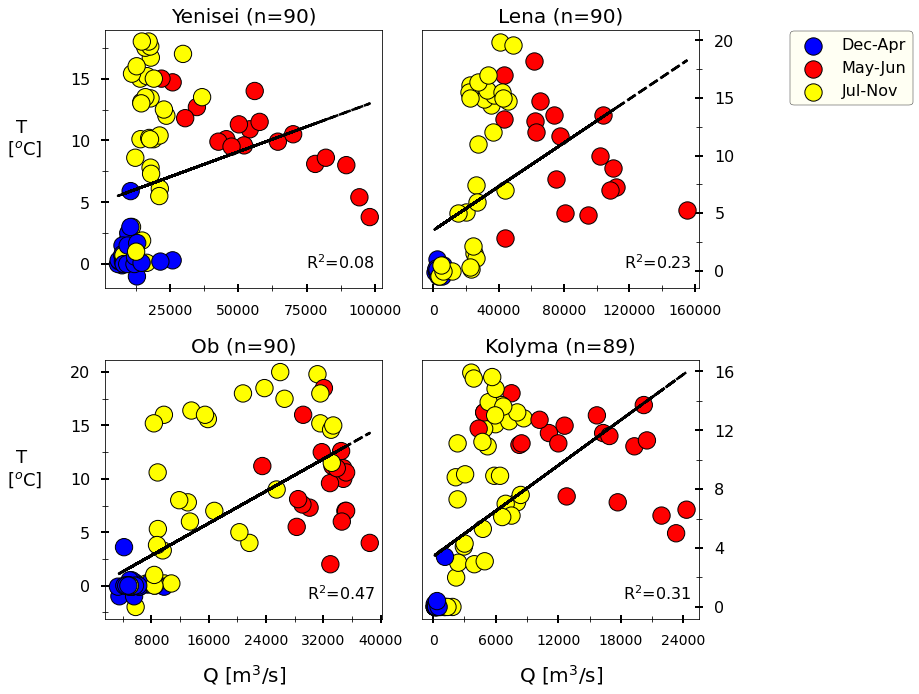

In [10]:
df_dfo = pd.DataFrame()
df_dfo['T'] = dfo['T']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['T'] = dfy['T']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['T'] = dfl['T']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['T'] = dfk['T']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['T'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['T'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['T'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['T'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['T'].mean())**2) / np.sum((df_dfo['T'] - df_dfo['T'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['T'].mean())**2) / np.sum((df_dfy['T'] - df_dfy['T'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['T'].mean())**2) / np.sum((df_dfl['T'] - df_dfl['T'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['T'].mean())**2) / np.sum((df_dfk['T'] - df_dfk['T'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['T'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['T'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['T'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['T'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'T'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('T \n[$^o$C]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('T \n[$^o$C]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.85, 0.10, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.85, 0.10, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.85, 0.10, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.85, 0.10, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_T_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

In [11]:
result = summarize_dataframe(df_dfy)
print(result)

              min        max       mean
T          -1.000     18.000      6.957
yq_m3/s  5850.000  98200.000  23673.690
model       5.516     12.984      6.957


<br><br><br><br><br><br>

# Conductivity (µS/cm)

<br><br><br><br><br><br>

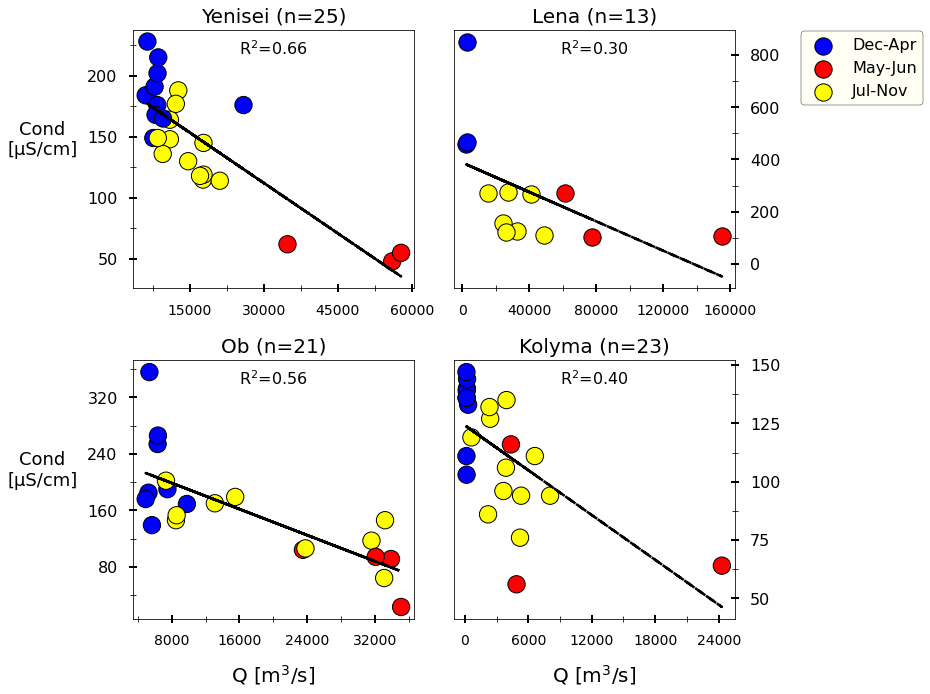

In [12]:
df_dfo = pd.DataFrame()
df_dfo['Cond'] = dfo['Cond']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['Cond'] = dfy['Cond']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['Cond'] = dfl['Cond']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['Cond'] = dfk['Cond']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['Cond'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['Cond'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['Cond'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['Cond'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['Cond'].mean())**2) / np.sum((df_dfo['Cond'] - df_dfo['Cond'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['Cond'].mean())**2) / np.sum((df_dfy['Cond'] - df_dfy['Cond'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['Cond'].mean())**2) / np.sum((df_dfl['Cond'] - df_dfl['Cond'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['Cond'].mean())**2) / np.sum((df_dfk['Cond'] - df_dfk['Cond'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['Cond'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['Cond'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['Cond'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['Cond'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'Cond'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('Cond\n[µS/cm]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('Cond\n[µS/cm]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.5, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.5, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.5, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.5, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_Cond_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# pH

<br><br><br><br><br><br>

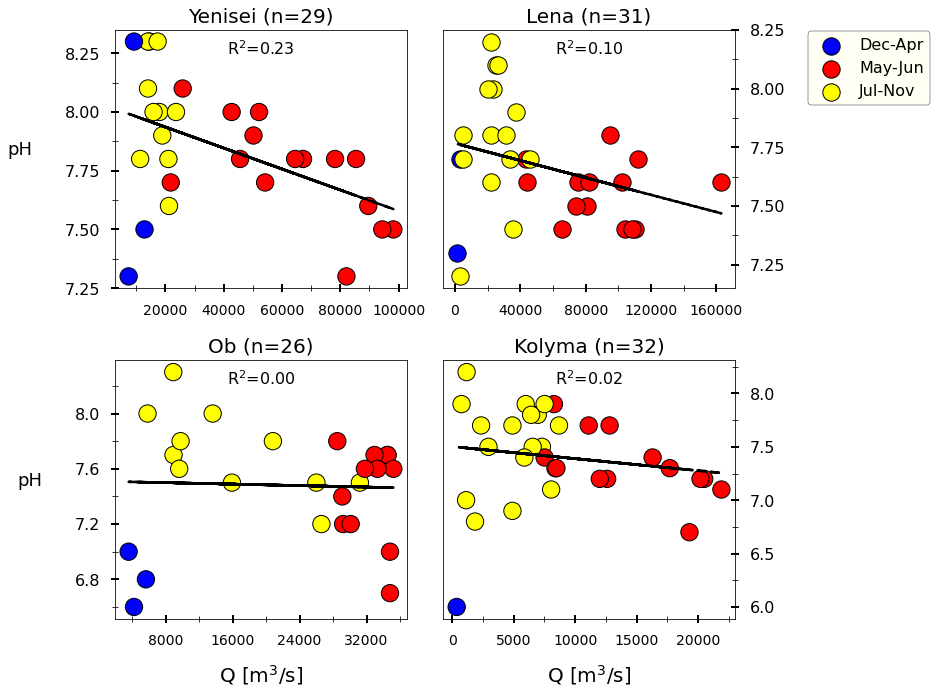

In [13]:
df_dfo = pd.DataFrame()
df_dfo['pH'] = dfo['pH']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['pH'] = dfy['pH']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['pH'] = dfl['pH']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['pH'] = dfk['pH']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['pH'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['pH'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['pH'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['pH'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['pH'].mean())**2) / np.sum((df_dfo['pH'] - df_dfo['pH'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['pH'].mean())**2) / np.sum((df_dfy['pH'] - df_dfy['pH'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['pH'].mean())**2) / np.sum((df_dfl['pH'] - df_dfl['pH'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['pH'].mean())**2) / np.sum((df_dfk['pH'] - df_dfk['pH'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['pH'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['pH'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['pH'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['pH'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'pH'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('pH', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('pH', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.5, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.5, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.5, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.5, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_pH_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

In [14]:
result = summarize_dataframe(df_dfy)
print(result)

              min        max       mean
pH          7.300      8.300      7.845
yq_m3/s  7350.000  98200.000  40376.897
model       7.587      7.992      7.845


<br><br><br><br><br><br>

# TSS

<br><br><br><br><br><br>

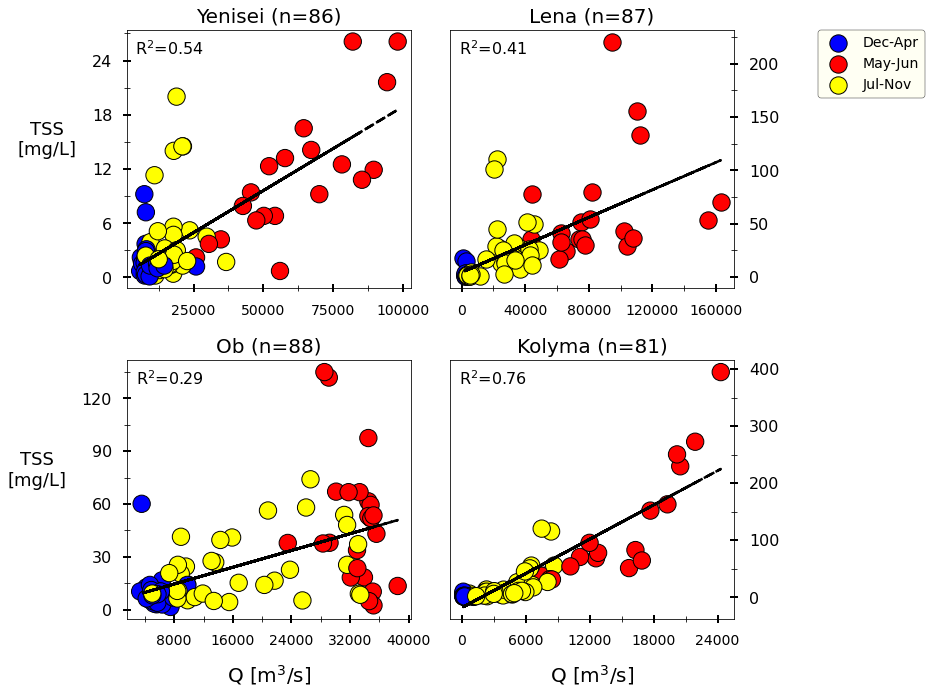

In [15]:
df_dfo = pd.DataFrame()
df_dfo['TSS'] = dfo['TSS']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['TSS'] = dfy['TSS']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['TSS'] = dfl['TSS']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['TSS'] = dfk['TSS']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['TSS'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['TSS'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['TSS'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['TSS'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['TSS'].mean())**2) / np.sum((df_dfo['TSS'] - df_dfo['TSS'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['TSS'].mean())**2) / np.sum((df_dfy['TSS'] - df_dfy['TSS'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['TSS'].mean())**2) / np.sum((df_dfl['TSS'] - df_dfl['TSS'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['TSS'].mean())**2) / np.sum((df_dfk['TSS'] - df_dfk['TSS'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['TSS'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['TSS'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['TSS'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['TSS'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'TSS'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('TSS\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('TSS\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_TSS_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# Alk

<br><br><br><br><br><br>

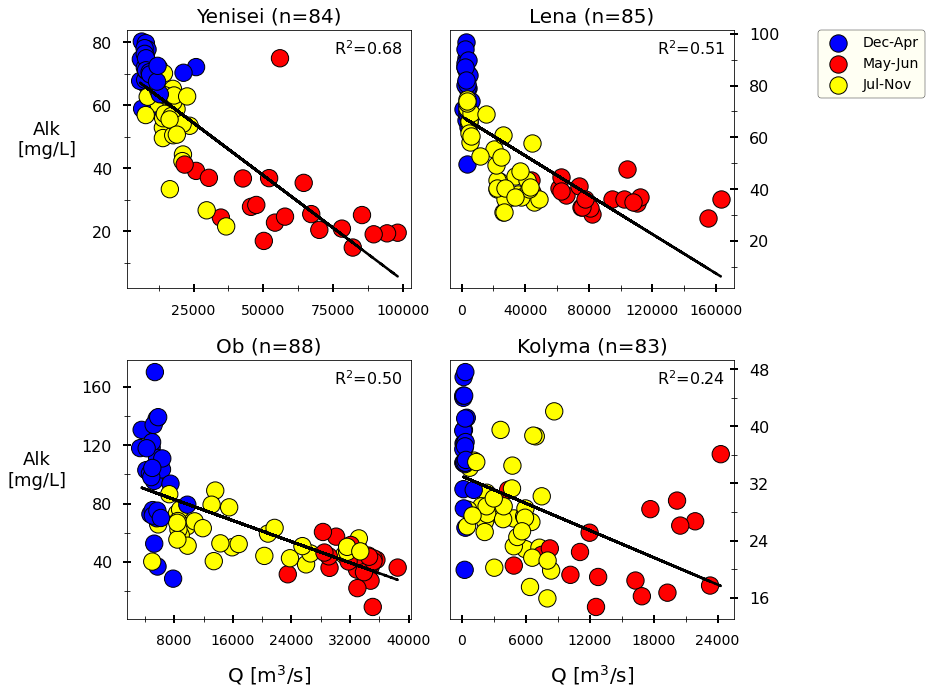

In [16]:
df_dfo = pd.DataFrame()
df_dfo['Alk'] = dfo['Alk']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['Alk'] = dfy['Alk']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['Alk'] = dfl['Alk']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['Alk'] = dfk['Alk']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['Alk'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['Alk'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['Alk'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['Alk'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['Alk'].mean())**2) / np.sum((df_dfo['Alk'] - df_dfo['Alk'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['Alk'].mean())**2) / np.sum((df_dfy['Alk'] - df_dfy['Alk'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['Alk'].mean())**2) / np.sum((df_dfl['Alk'] - df_dfl['Alk'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['Alk'].mean())**2) / np.sum((df_dfk['Alk'] - df_dfk['Alk'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['Alk'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['Alk'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['Alk'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['Alk'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'Alk'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('Alk\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('Alk\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.85, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.85, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.85, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.85, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_Alk_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# Alk [umol/kg]

<br><br><br><br><br><br>

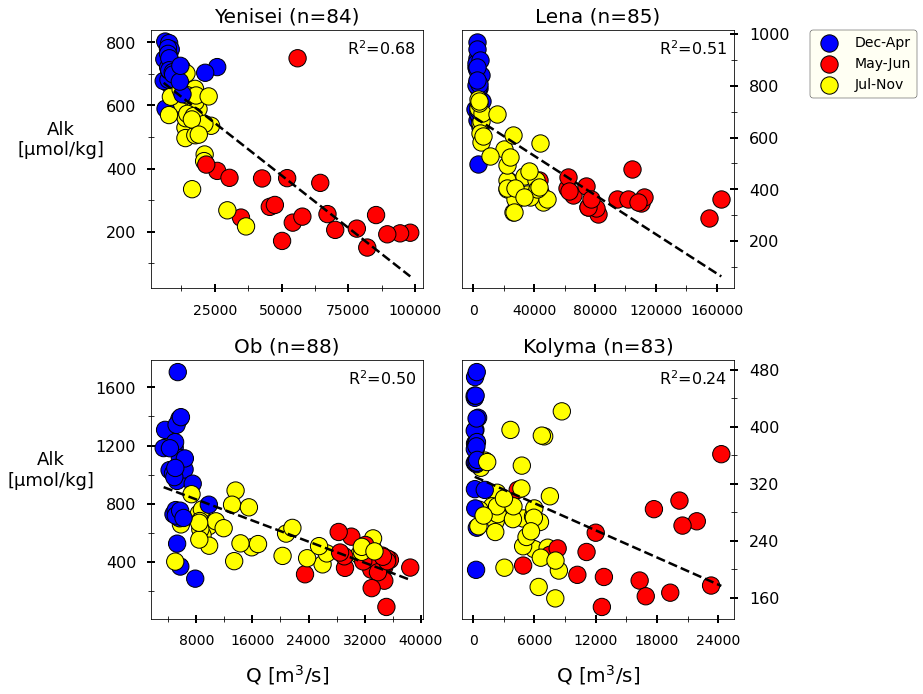

In [17]:
df_dfo = pd.DataFrame()
df_dfo['Alk_uM'] = dfo['Alk_uM']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()
df_dfo= df_dfo.sort_index()

df_dfy = pd.DataFrame()
df_dfy['Alk_uM'] = dfy['Alk_uM']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()
df_dfy= df_dfy.sort_index()

df_dfl = pd.DataFrame()
df_dfl['Alk_uM'] = dfl['Alk_uM']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()
df_dfl= df_dfl.sort_index()

df_dfk = pd.DataFrame()
df_dfk['Alk_uM'] = dfk['Alk_uM']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()
df_dfk= df_dfk.sort_index()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['Alk_uM'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['Alk_uM'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['Alk_uM'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['Alk_uM'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['Alk_uM'].mean())**2) / np.sum((df_dfo['Alk_uM'] - df_dfo['Alk_uM'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['Alk_uM'].mean())**2) / np.sum((df_dfy['Alk_uM'] - df_dfy['Alk_uM'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['Alk_uM'].mean())**2) / np.sum((df_dfl['Alk_uM'] - df_dfl['Alk_uM'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['Alk_uM'].mean())**2) / np.sum((df_dfk['Alk_uM'] - df_dfk['Alk_uM'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['Alk_uM'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['Alk_uM'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['Alk_uM'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['Alk_uM'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'Alk_uM'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('Alk\n[µmol/kg]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('Alk\n[µmol/kg]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.85, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.85, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.85, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.85, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_Alk_uM_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

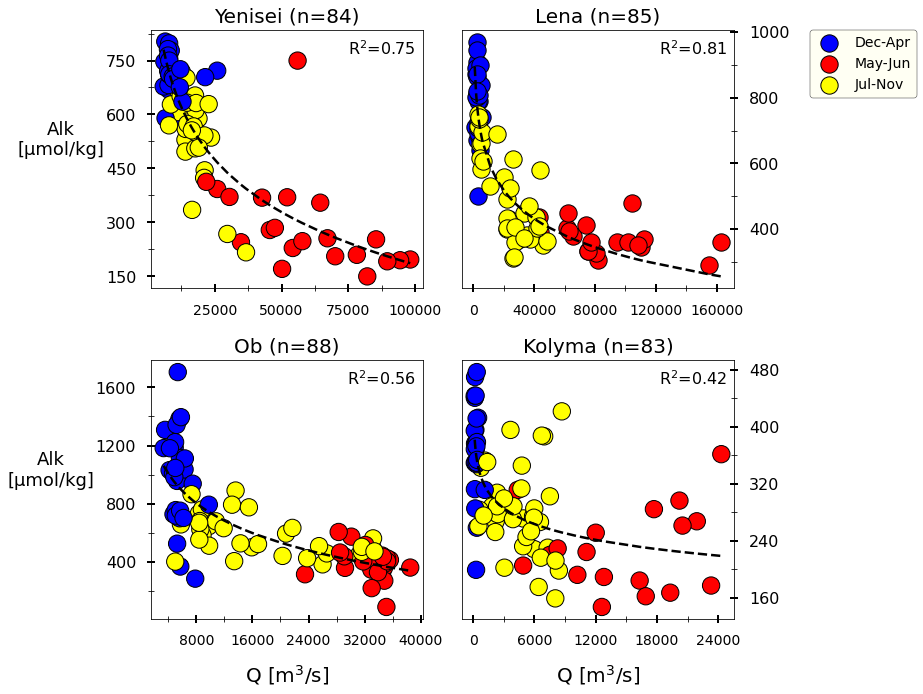

In [18]:
df_dfo = pd.DataFrame()
df_dfo['Alk_uM'] = dfo['Alk_uM']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()
df_dfo= df_dfo.sort_index()

df_dfy = pd.DataFrame()
df_dfy['Alk_uM'] = dfy['Alk_uM']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()
df_dfy= df_dfy.sort_index()

df_dfl = pd.DataFrame()
df_dfl['Alk_uM'] = dfl['Alk_uM']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()
df_dfl= df_dfl.sort_index()

df_dfk = pd.DataFrame()
df_dfk['Alk_uM'] = dfk['Alk_uM']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()
df_dfk= df_dfk.sort_index()

# Regression Equation
def model(x,a,b):
    return a*np.log(x) + b

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['Alk_uM'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['Alk_uM'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['Alk_uM'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['Alk_uM'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['Alk_uM'].mean())**2) / np.sum((df_dfo['Alk_uM'] - df_dfo['Alk_uM'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['Alk_uM'].mean())**2) / np.sum((df_dfy['Alk_uM'] - df_dfy['Alk_uM'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['Alk_uM'].mean())**2) / np.sum((df_dfl['Alk_uM'] - df_dfl['Alk_uM'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['Alk_uM'].mean())**2) / np.sum((df_dfk['Alk_uM'] - df_dfk['Alk_uM'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['Alk_uM'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['Alk_uM'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['Alk_uM'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['Alk_uM'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'Alk_uM'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('Alk\n[µmol/kg]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('Alk\n[µmol/kg]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.85, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.85, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.85, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.85, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_Alk_uM_DISCHARGE_Regression_log.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# Ca

<br><br><br><br><br><br>

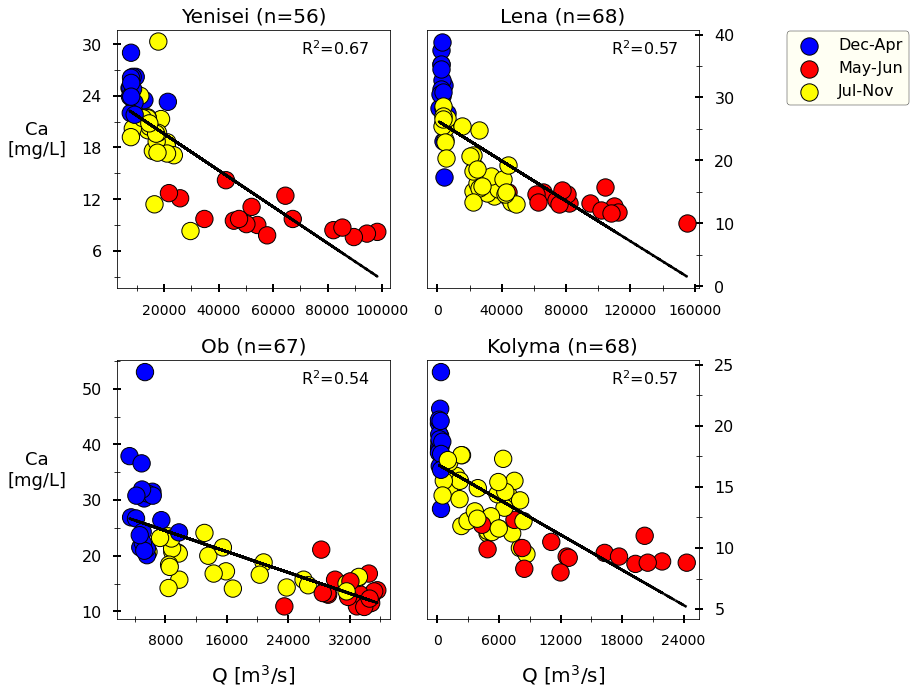

In [19]:
df_dfo = pd.DataFrame()
df_dfo['Ca'] = dfo['Ca']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['Ca'] = dfy['Ca']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['Ca'] = dfl['Ca']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['Ca'] = dfk['Ca']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['Ca'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['Ca'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['Ca'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['Ca'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['Ca'].mean())**2) / np.sum((df_dfo['Ca'] - df_dfo['Ca'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['Ca'].mean())**2) / np.sum((df_dfy['Ca'] - df_dfy['Ca'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['Ca'].mean())**2) / np.sum((df_dfl['Ca'] - df_dfl['Ca'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['Ca'].mean())**2) / np.sum((df_dfk['Ca'] - df_dfk['Ca'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['Ca'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['Ca'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['Ca'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['Ca'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'Ca'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('Ca\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('Ca\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.80, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.80, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.80, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.80, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_Ca_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

In [20]:
def summarize_dataframe(df):
    summary = df.describe()
    return summary.loc[['min', 'mean', 'max']].T.round(3)

result = summarize_dataframe(df_dfy)
print(result)

              min       mean        max
Ca          7.600     17.984     30.300
yq_m3/s  7350.000  27586.071  98200.000
model       3.031     17.984     22.269


<br><br><br><br><br><br>

# Mg

<br><br><br><br><br><br>

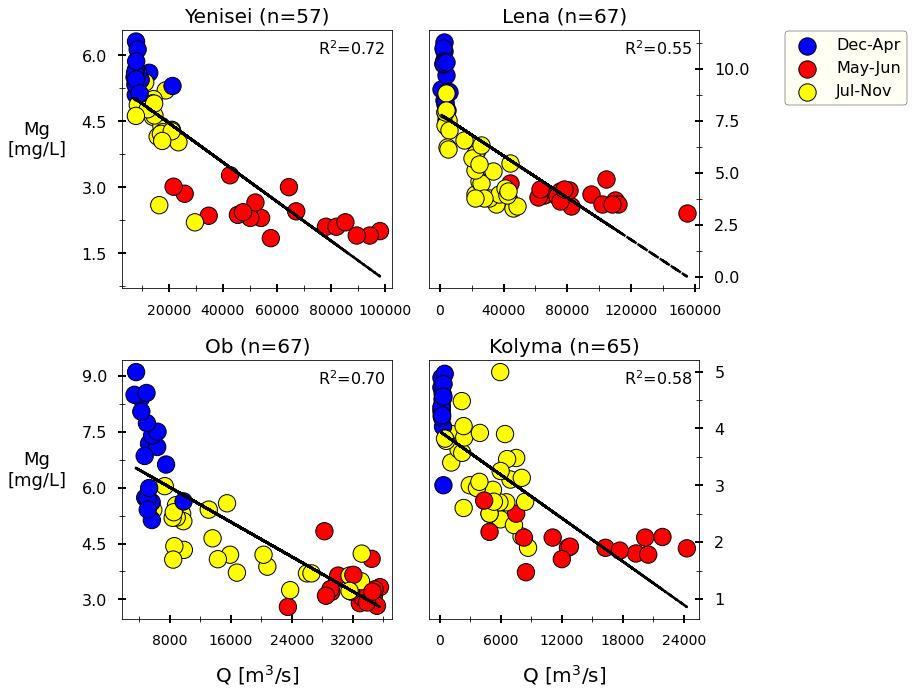

In [21]:
df_dfo = pd.DataFrame()
df_dfo['Mg'] = dfo['Mg']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['Mg'] = dfy['Mg']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['Mg'] = dfl['Mg']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['Mg'] = dfk['Mg']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['Mg'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['Mg'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['Mg'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['Mg'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['Mg'].mean())**2) / np.sum((df_dfo['Mg'] - df_dfo['Mg'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['Mg'].mean())**2) / np.sum((df_dfy['Mg'] - df_dfy['Mg'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['Mg'].mean())**2) / np.sum((df_dfl['Mg'] - df_dfl['Mg'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['Mg'].mean())**2) / np.sum((df_dfk['Mg'] - df_dfk['Mg'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['Mg'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['Mg'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['Mg'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['Mg'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'Mg'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('Mg\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('Mg\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.85, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.85, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.85, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.85, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_Mg_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

In [22]:
result = summarize_dataframe(df_dfy)
print(result)

              min       mean        max
Mg          1.840      4.081      6.310
yq_m3/s  7350.000  28474.035  98200.000
model       0.971      4.081      5.024


<br><br><br><br><br><br>

# SO4

<br><br><br><br><br><br>

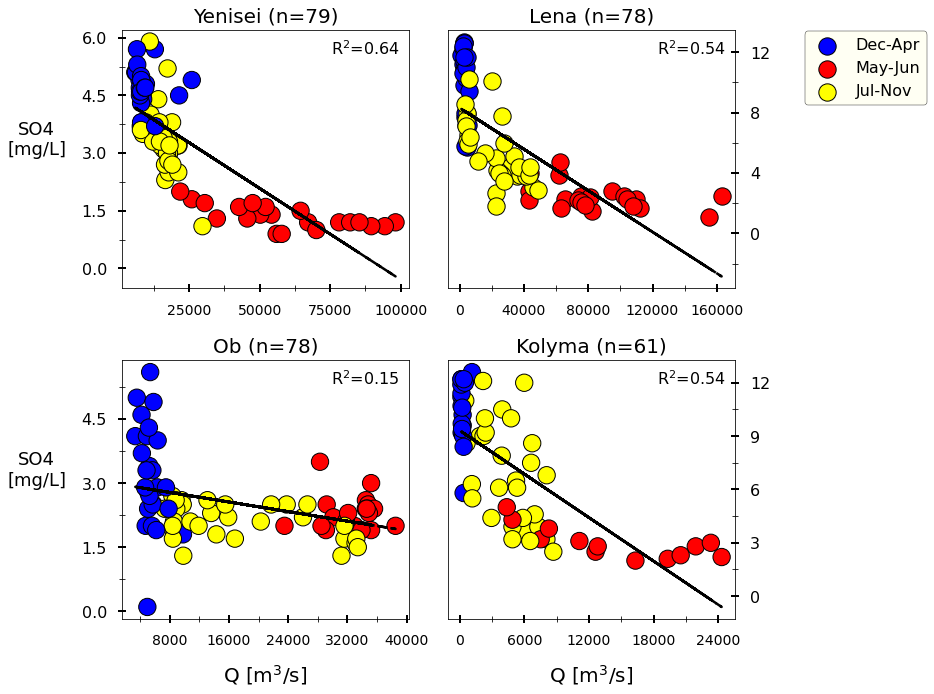

In [23]:
df_dfo = pd.DataFrame()
df_dfo['SO4'] = dfo['SO4']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['SO4'] = dfy['SO4']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['SO4'] = dfl['SO4']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['SO4'] = dfk['SO4']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['SO4'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['SO4'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['SO4'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['SO4'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['SO4'].mean())**2) / np.sum((df_dfo['SO4'] - df_dfo['SO4'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['SO4'].mean())**2) / np.sum((df_dfy['SO4'] - df_dfy['SO4'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['SO4'].mean())**2) / np.sum((df_dfl['SO4'] - df_dfl['SO4'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['SO4'].mean())**2) / np.sum((df_dfk['SO4'] - df_dfk['SO4'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['SO4'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['SO4'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['SO4'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['SO4'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'SO4'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('SO4\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('SO4\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.85, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.85, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.85, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.85, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_SO4_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

In [24]:
result = summarize_dataframe(df_dfy)
print(result)

              min       mean        max
SO4         0.900      3.253      5.900
yq_m3/s  5850.000  25342.278  98200.000
model      -0.206      3.253      4.179


<br><br><br><br><br><br>

# SiO2

<br><br><br><br><br><br>

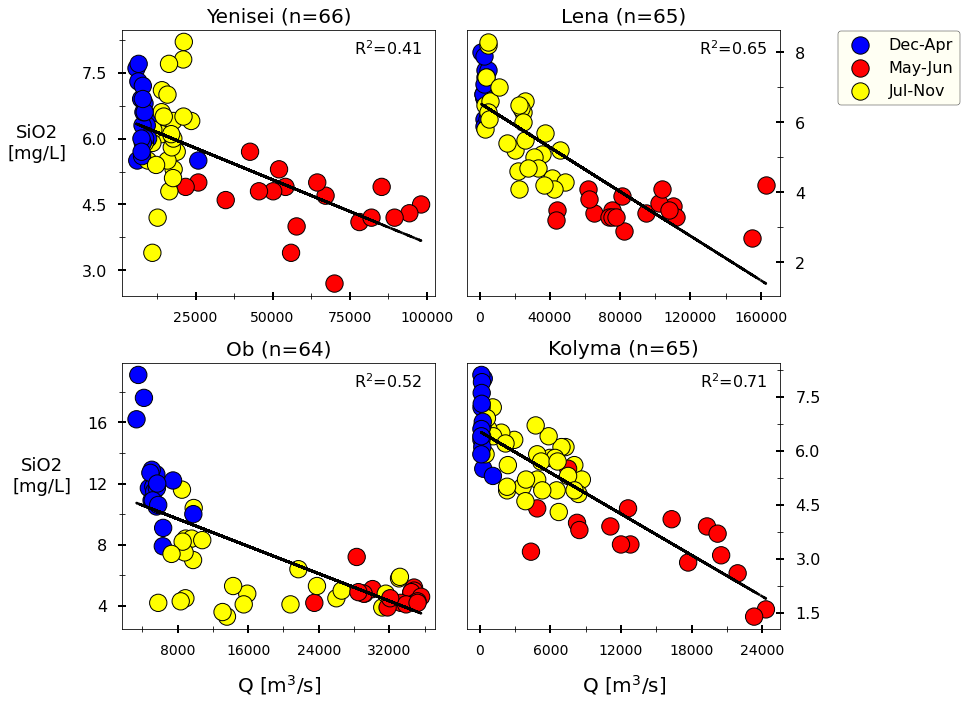

In [25]:
df_dfo = pd.DataFrame()
df_dfo['SiO2'] = dfo['SiO2']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['SiO2'] = dfy['SiO2']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['SiO2'] = dfl['SiO2']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['SiO2'] = dfk['SiO2']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['SiO2'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['SiO2'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['SiO2'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['SiO2'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['SiO2'].mean())**2) / np.sum((df_dfo['SiO2'] - df_dfo['SiO2'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['SiO2'].mean())**2) / np.sum((df_dfy['SiO2'] - df_dfy['SiO2'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['SiO2'].mean())**2) / np.sum((df_dfl['SiO2'] - df_dfl['SiO2'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['SiO2'].mean())**2) / np.sum((df_dfk['SiO2'] - df_dfk['SiO2'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['SiO2'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['SiO2'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['SiO2'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['SiO2'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'SiO2'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.6, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('SiO2\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('SiO2\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.85, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.85, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.85, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.85, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=1.5)

fig.savefig('AGRO_Siberian_SiO2_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# Na

<br><br><br><br><br><br>

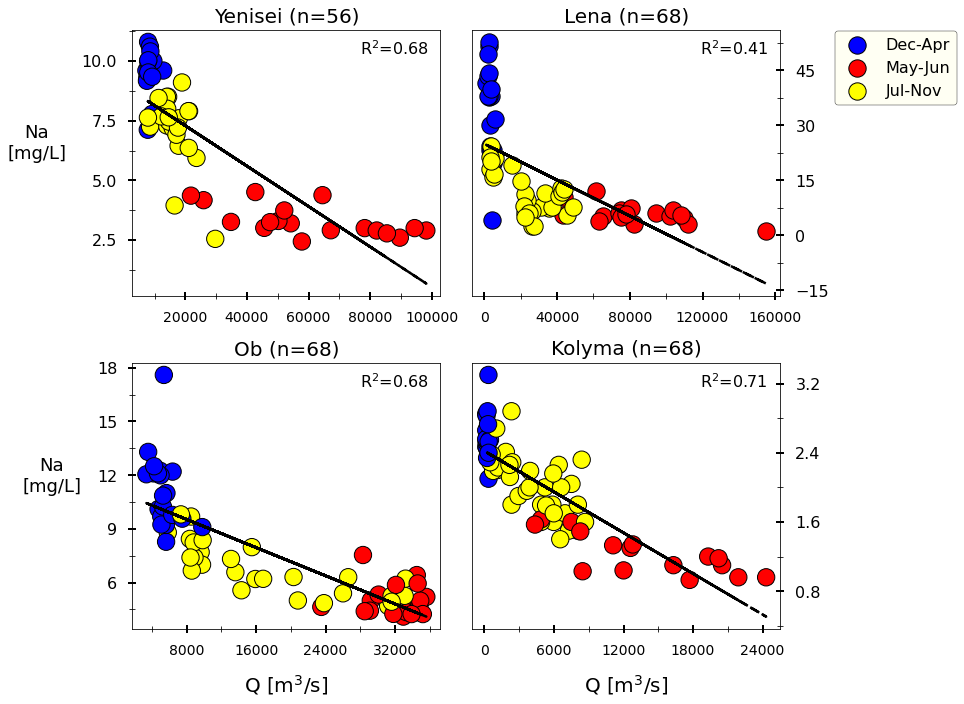

In [26]:
df_dfo = pd.DataFrame()
df_dfo['Na'] = dfo['Na']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['Na'] = dfy['Na']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['Na'] = dfl['Na']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['Na'] = dfk['Na']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['Na'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['Na'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['Na'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['Na'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['Na'].mean())**2) / np.sum((df_dfo['Na'] - df_dfo['Na'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['Na'].mean())**2) / np.sum((df_dfy['Na'] - df_dfy['Na'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['Na'].mean())**2) / np.sum((df_dfl['Na'] - df_dfl['Na'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['Na'].mean())**2) / np.sum((df_dfk['Na'] - df_dfk['Na'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['Na'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['Na'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['Na'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['Na'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'Na'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.6, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('Na\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('Na\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.85, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.85, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.85, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.85, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=1.5)

fig.savefig('AGRO_Siberian_Na_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

In [27]:
result = summarize_dataframe(df_dfy)
print(result)

              min       mean        max
Na          2.440      6.561     10.800
yq_m3/s  7350.000  28600.357  98200.000
model       0.677      6.561      8.357


<br><br><br><br><br><br><br><br><br><br><br><br>

# DOC

<br><br><br><br><br><br><br><br><br><br><br><br>

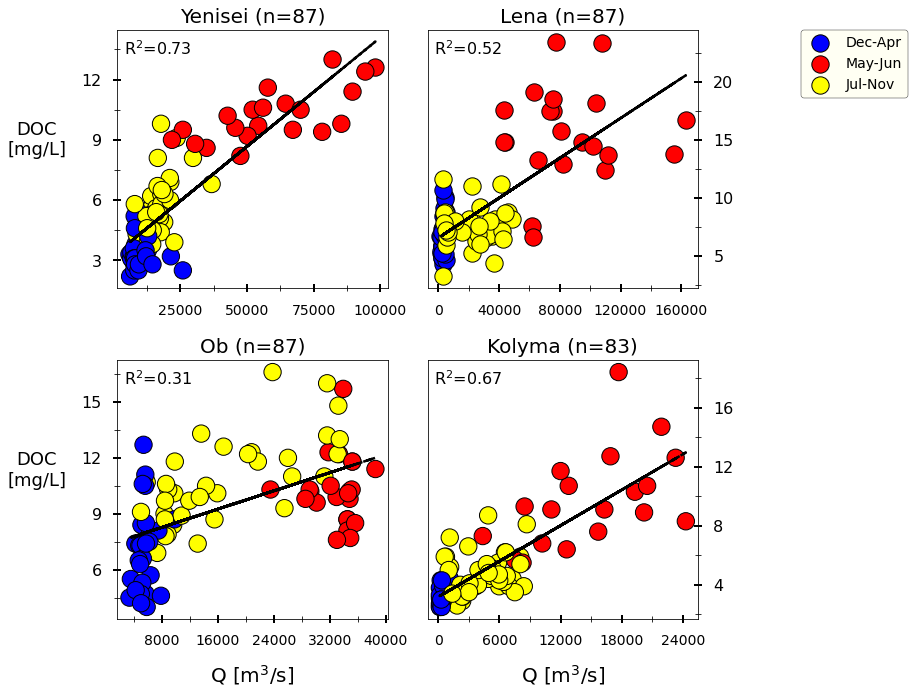

In [28]:
df_dfo = pd.DataFrame()
df_dfo['DOC'] = dfo['DOC']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['DOC'] = dfy['DOC']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['DOC'] = dfl['DOC']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['DOC'] = dfk['DOC']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['DOC'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['DOC'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['DOC'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['DOC'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['DOC'].mean())**2) / np.sum((df_dfo['DOC'] - df_dfo['DOC'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['DOC'].mean())**2) / np.sum((df_dfy['DOC'] - df_dfy['DOC'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['DOC'].mean())**2) / np.sum((df_dfl['DOC'] - df_dfl['DOC'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['DOC'].mean())**2) / np.sum((df_dfk['DOC'] - df_dfk['DOC'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['DOC'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['DOC'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['DOC'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['DOC'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'DOC'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('DOC\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('DOC\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_DOC_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

In [29]:
result = summarize_dataframe(df_dfy)
print(result)

             min       mean        max
DOC         2.20      5.921     13.000
yq_m3/s  5850.00  24597.931  98200.000
model       3.89      5.921     13.894


<br><br><br><br><br><br>

# POC

<br><br><br><br><br><br>

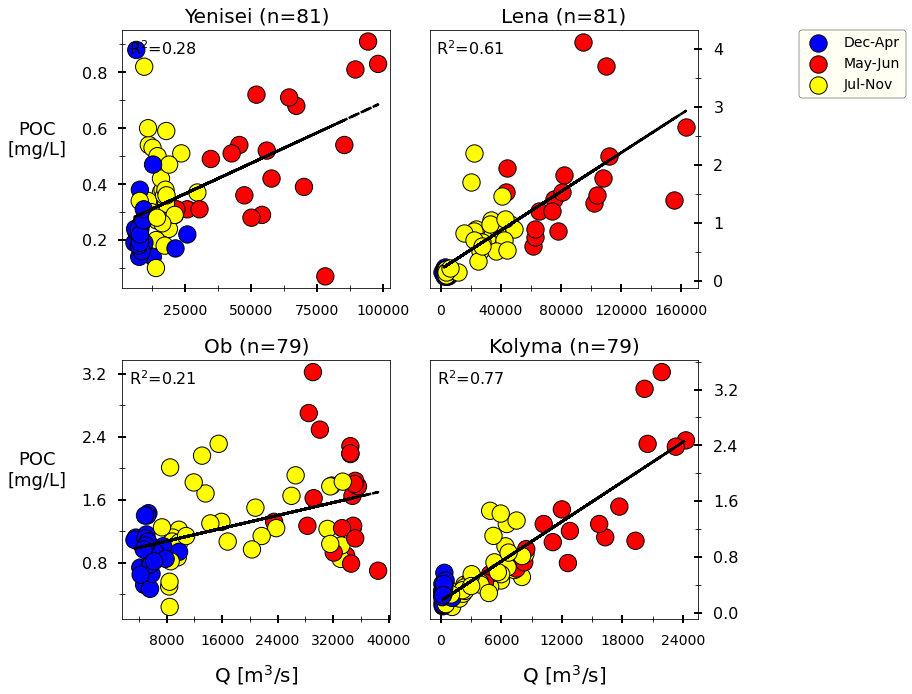

In [30]:
df_dfo = pd.DataFrame()
df_dfo['POC'] = dfo['POC']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['POC'] = dfy['POC']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['POC'] = dfl['POC']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['POC'] = dfk['POC']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['POC'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['POC'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['POC'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['POC'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['POC'].mean())**2) / np.sum((df_dfo['POC'] - df_dfo['POC'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['POC'].mean())**2) / np.sum((df_dfy['POC'] - df_dfy['POC'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['POC'].mean())**2) / np.sum((df_dfl['POC'] - df_dfl['POC'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['POC'].mean())**2) / np.sum((df_dfk['POC'] - df_dfk['POC'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['POC'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['POC'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['POC'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['POC'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'POC'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('POC\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('POC\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_POC_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# PON

<br><br><br><br><br><br>

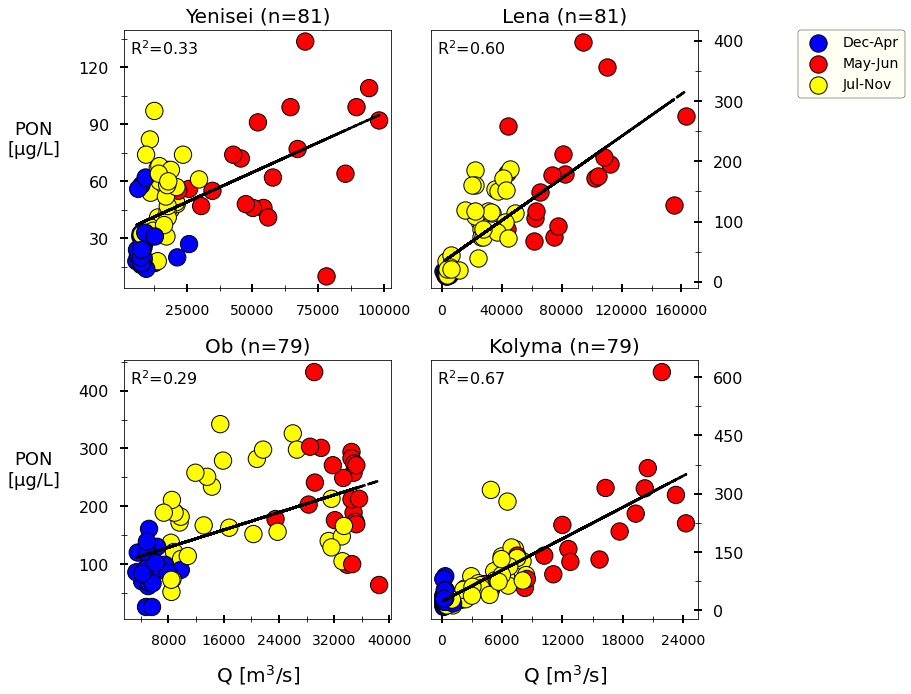

In [31]:
df_dfo = pd.DataFrame()
df_dfo['PON'] = dfo['PON']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['PON'] = dfy['PON']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['PON'] = dfl['PON']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['PON'] = dfk['PON']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['PON'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['PON'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['PON'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['PON'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['PON'].mean())**2) / np.sum((df_dfo['PON'] - df_dfo['PON'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['PON'].mean())**2) / np.sum((df_dfy['PON'] - df_dfy['PON'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['PON'].mean())**2) / np.sum((df_dfl['PON'] - df_dfl['PON'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['PON'].mean())**2) / np.sum((df_dfk['PON'] - df_dfk['PON'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['PON'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['PON'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['PON'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['PON'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'PON'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('PON\n[µg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('PON\n[µg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_PON_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# TDN

<br><br><br><br><br><br>

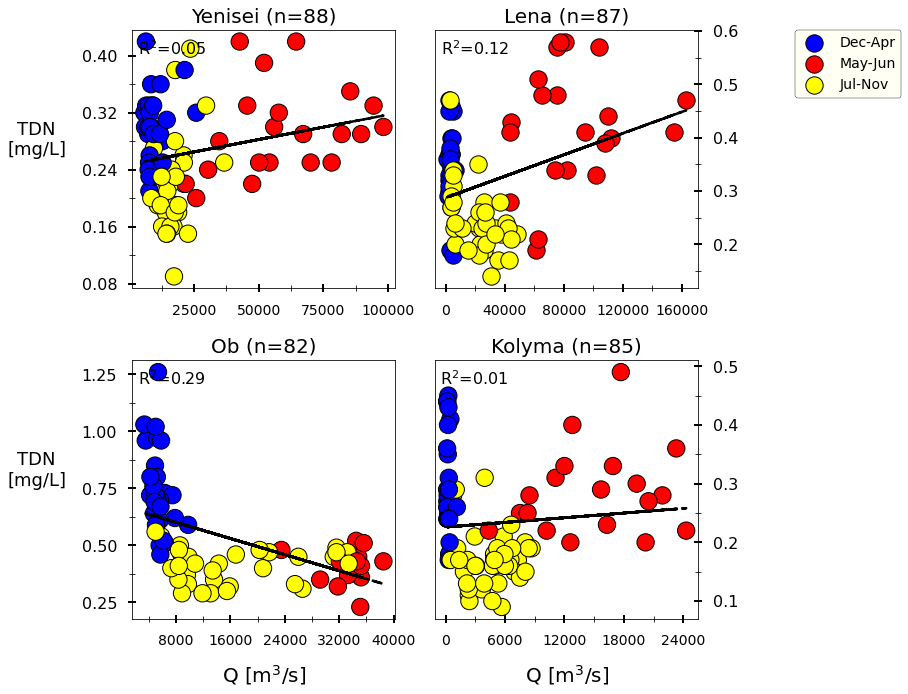

In [32]:
df_dfo = pd.DataFrame()
df_dfo['TDN'] = dfo['TDN']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['TDN'] = dfy['TDN']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['TDN'] = dfl['TDN']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['TDN'] = dfk['TDN']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['TDN'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['TDN'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['TDN'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['TDN'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['TDN'].mean())**2) / np.sum((df_dfo['TDN'] - df_dfo['TDN'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['TDN'].mean())**2) / np.sum((df_dfy['TDN'] - df_dfy['TDN'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['TDN'].mean())**2) / np.sum((df_dfl['TDN'] - df_dfl['TDN'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['TDN'].mean())**2) / np.sum((df_dfk['TDN'] - df_dfk['TDN'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['TDN'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['TDN'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['TDN'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['TDN'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'TDN'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('TDN\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('TDN\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_TDN_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# NO3

<br><br><br><br><br><br>

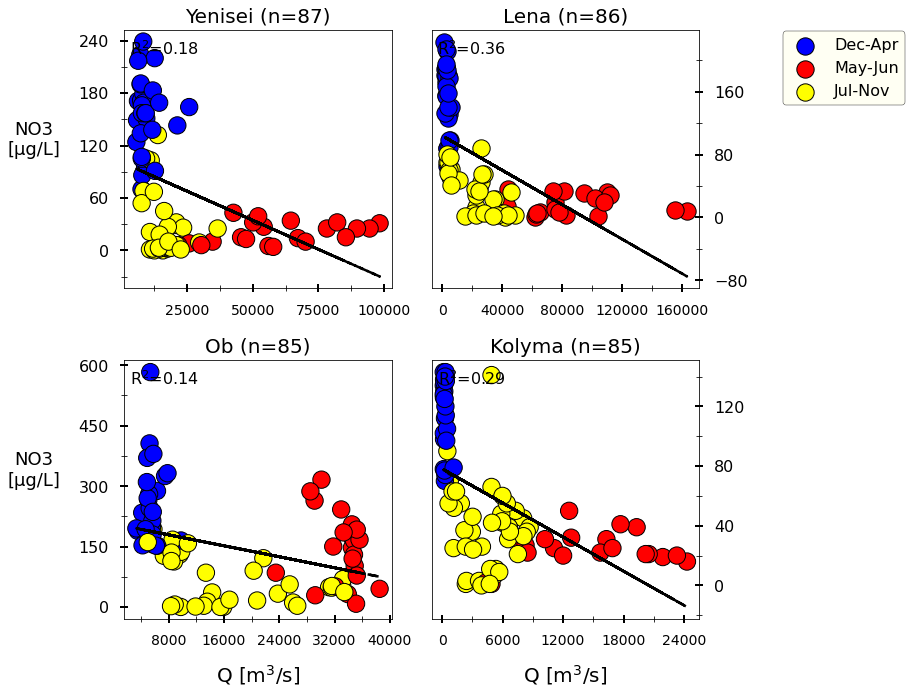

In [33]:
df_dfo = pd.DataFrame()
df_dfo['NO3'] = dfo['NO3']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['NO3'] = dfy['NO3']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['NO3'] = dfl['NO3']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['NO3'] = dfk['NO3']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['NO3'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['NO3'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['NO3'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['NO3'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['NO3'].mean())**2) / np.sum((df_dfo['NO3'] - df_dfo['NO3'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['NO3'].mean())**2) / np.sum((df_dfy['NO3'] - df_dfy['NO3'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['NO3'].mean())**2) / np.sum((df_dfl['NO3'] - df_dfl['NO3'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['NO3'].mean())**2) / np.sum((df_dfk['NO3'] - df_dfk['NO3'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['NO3'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['NO3'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['NO3'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['NO3'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'NO3'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('NO3\n[µg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('NO3\n[µg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_NO3_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# NH4

<br><br><br><br><br><br>

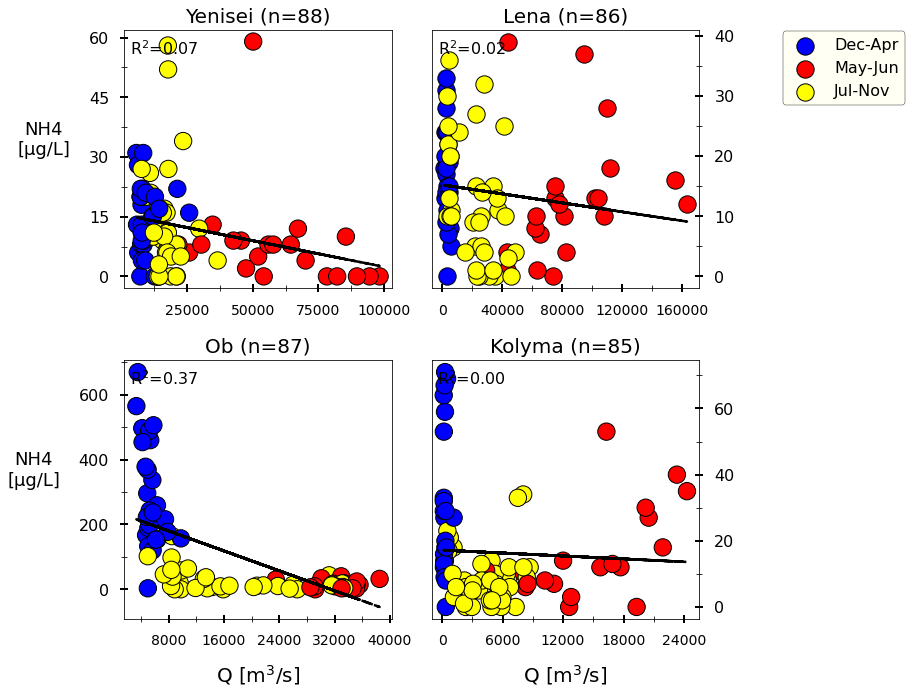

In [34]:
df_dfo = pd.DataFrame()
df_dfo['NH4'] = dfo['NH4']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['NH4'] = dfy['NH4']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['NH4'] = dfl['NH4']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['NH4'] = dfk['NH4']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['NH4'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['NH4'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['NH4'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['NH4'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['NH4'].mean())**2) / np.sum((df_dfo['NH4'] - df_dfo['NH4'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['NH4'].mean())**2) / np.sum((df_dfy['NH4'] - df_dfy['NH4'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['NH4'].mean())**2) / np.sum((df_dfl['NH4'] - df_dfl['NH4'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['NH4'].mean())**2) / np.sum((df_dfk['NH4'] - df_dfk['NH4'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['NH4'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['NH4'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['NH4'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['NH4'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'NH4'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('NH4\n[µg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('NH4\n[µg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_NH4_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# TDP

<br><br><br><br><br><br>

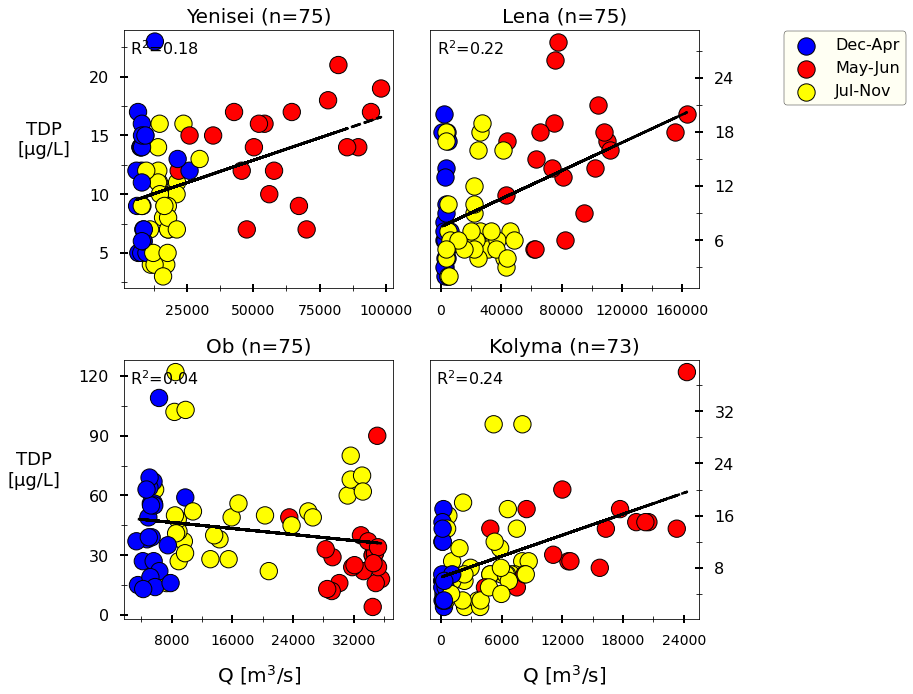

In [35]:
df_dfo = pd.DataFrame()
df_dfo['TDP'] = dfo['TDP']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['TDP'] = dfy['TDP']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['TDP'] = dfl['TDP']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['TDP'] = dfk['TDP']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['TDP'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['TDP'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['TDP'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['TDP'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['TDP'].mean())**2) / np.sum((df_dfo['TDP'] - df_dfo['TDP'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['TDP'].mean())**2) / np.sum((df_dfy['TDP'] - df_dfy['TDP'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['TDP'].mean())**2) / np.sum((df_dfl['TDP'] - df_dfl['TDP'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['TDP'].mean())**2) / np.sum((df_dfk['TDP'] - df_dfk['TDP'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['TDP'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['TDP'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['TDP'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['TDP'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'TDP'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('TDP\n[µg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('TDP\n[µg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_TDP_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# PO4

<br><br><br><br><br><br>

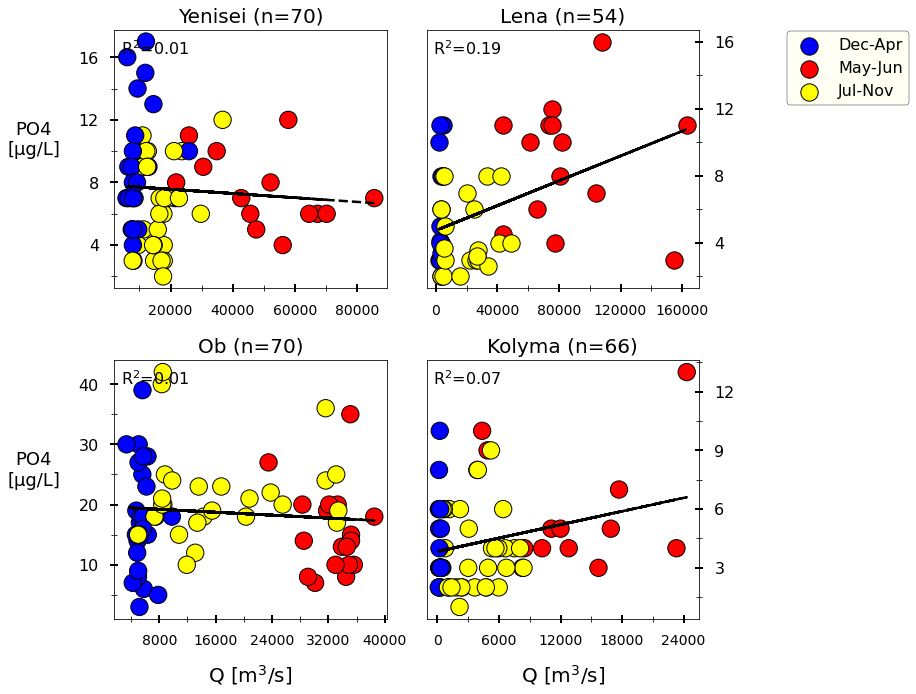

In [36]:
df_dfo = pd.DataFrame()
df_dfo['PO4'] = dfo['PO4']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['PO4'] = dfy['PO4']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['PO4'] = dfl['PO4']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['PO4'] = dfk['PO4']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['PO4'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['PO4'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['PO4'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['PO4'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['PO4'].mean())**2) / np.sum((df_dfo['PO4'] - df_dfo['PO4'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['PO4'].mean())**2) / np.sum((df_dfy['PO4'] - df_dfy['PO4'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['PO4'].mean())**2) / np.sum((df_dfl['PO4'] - df_dfl['PO4'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['PO4'].mean())**2) / np.sum((df_dfk['PO4'] - df_dfk['PO4'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['PO4'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['PO4'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['PO4'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['PO4'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'PO4'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('PO4\n[µg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('PO4\n[µg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_PO4_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# a254

<br><br><br><br><br><br>

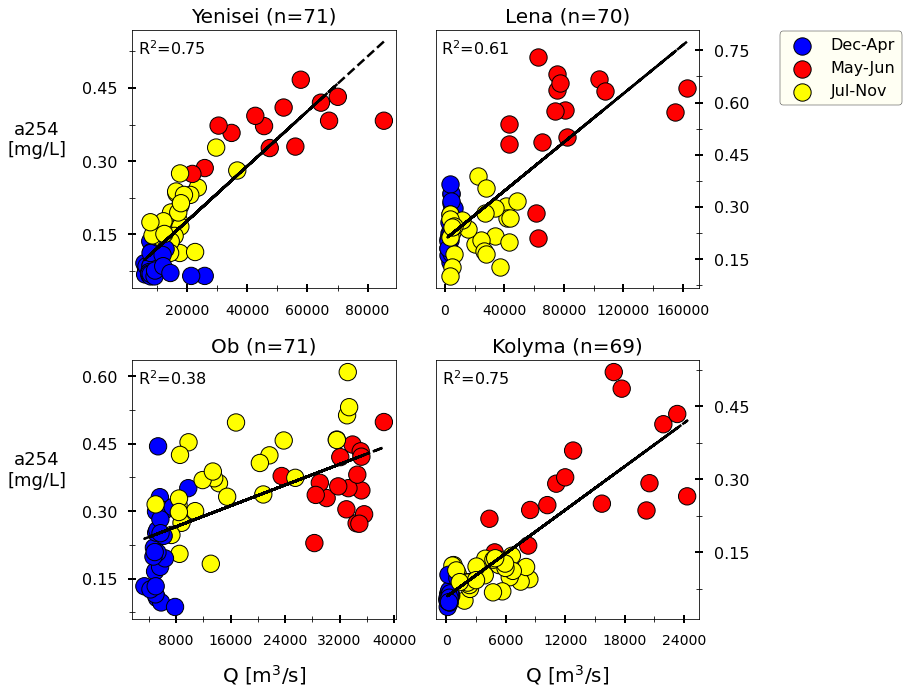

In [37]:
df_dfo = pd.DataFrame()
df_dfo['a254'] = dfo['a254']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['a254'] = dfy['a254']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['a254'] = dfl['a254']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['a254'] = dfk['a254']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['a254'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['a254'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['a254'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['a254'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['a254'].mean())**2) / np.sum((df_dfo['a254'] - df_dfo['a254'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['a254'].mean())**2) / np.sum((df_dfy['a254'] - df_dfy['a254'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['a254'].mean())**2) / np.sum((df_dfl['a254'] - df_dfl['a254'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['a254'].mean())**2) / np.sum((df_dfk['a254'] - df_dfk['a254'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['a254'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['a254'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['a254'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['a254'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'a254'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('a254\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('a254\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_a254_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

<br><br><br><br><br><br>

# F

<br><br><br><br><br><br>

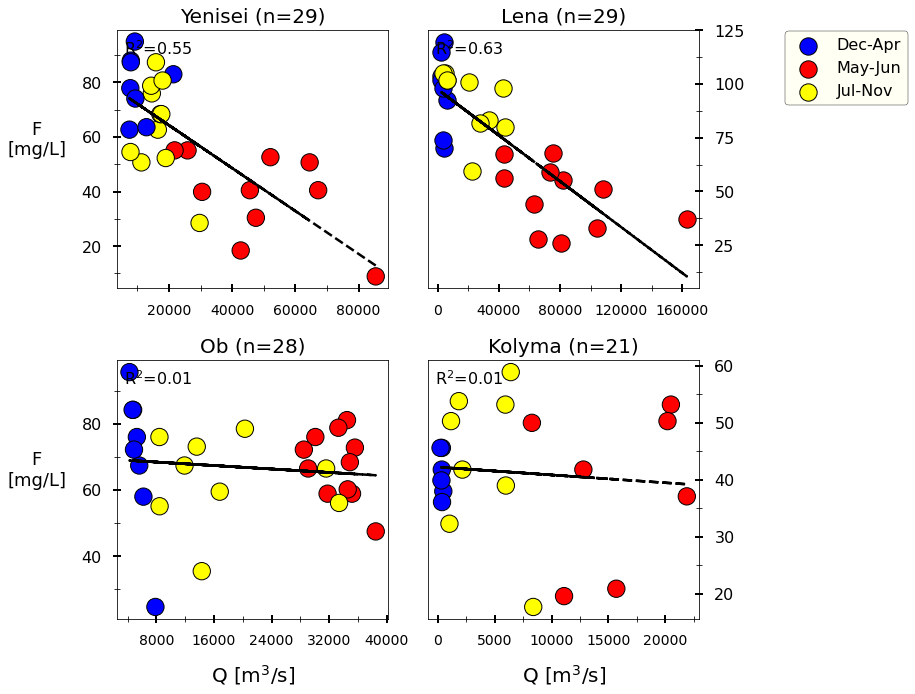

In [38]:
df_dfo = pd.DataFrame()
df_dfo['F'] = dfo['F']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['F'] = dfy['F']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['F'] = dfl['F']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['F'] = dfk['F']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['F'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['F'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['F'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['F'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['F'].mean())**2) / np.sum((df_dfo['F'] - df_dfo['F'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['F'].mean())**2) / np.sum((df_dfy['F'] - df_dfy['F'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['F'].mean())**2) / np.sum((df_dfl['F'] - df_dfl['F'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['F'].mean())**2) / np.sum((df_dfk['F'] - df_dfk['F'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['F'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['F'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['F'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['F'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'F'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('F\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('F\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.15, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_F_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

In [39]:
result = summarize_dataframe(df_dfy)
print(result)

              min       mean        max
F           8.900     59.731     95.000
yq_m3/s  7530.000  25845.517  85400.000
model      12.882     59.731     74.139


<br><br><br>

# Ca_Mg

<br><br><br>

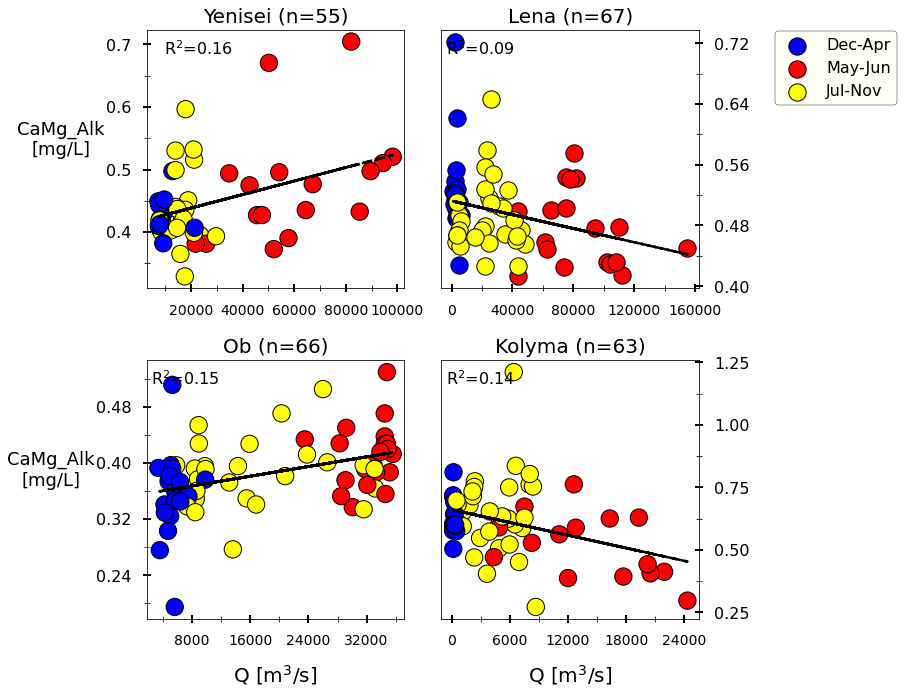

In [40]:
df_dfo = pd.DataFrame()
df_dfo['camg_alk'] = dfo['camg_alk']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['camg_alk'] = dfy['camg_alk']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['camg_alk'] = dfl['camg_alk']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['camg_alk'] = dfk['camg_alk']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['camg_alk'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['camg_alk'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['camg_alk'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['camg_alk'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['camg_alk'].mean())**2) / np.sum((df_dfo['camg_alk'] - df_dfo['camg_alk'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['camg_alk'].mean())**2) / np.sum((df_dfy['camg_alk'] - df_dfy['camg_alk'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['camg_alk'].mean())**2) / np.sum((df_dfl['camg_alk'] - df_dfl['camg_alk'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['camg_alk'].mean())**2) / np.sum((df_dfk['camg_alk'] - df_dfk['camg_alk'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['camg_alk'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['camg_alk'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['camg_alk'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['camg_alk'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'camg_alk'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.8, 1.025), facecolor='ivory', edgecolor='black', fontsize=16)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('CaMg_Alk\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('CaMg_Alk\n[mg/L]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.20, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.15, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.15, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.15, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_CaMg_Alk_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

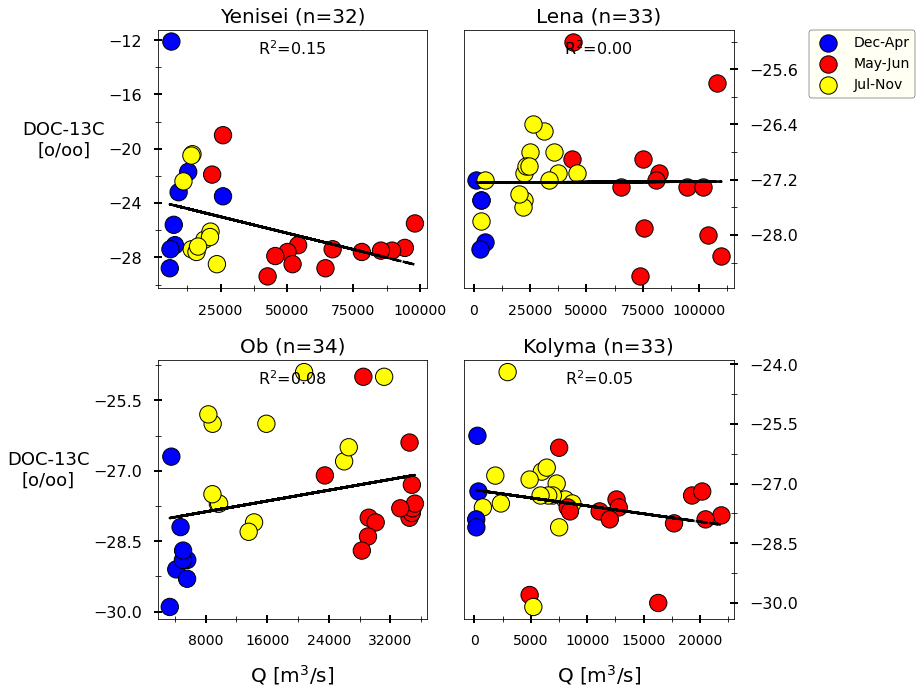

In [41]:
df_dfo = pd.DataFrame()
df_dfo['DOC-13C'] = dfo['DOC-13C']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['DOC-13C'] = dfy['DOC-13C']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['DOC-13C'] = dfl['DOC-13C']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['DOC-13C'] = dfk['DOC-13C']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['DOC-13C'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['DOC-13C'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['DOC-13C'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['DOC-13C'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['DOC-13C'].mean())**2) / np.sum((df_dfo['DOC-13C'] - df_dfo['DOC-13C'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['DOC-13C'].mean())**2) / np.sum((df_dfy['DOC-13C'] - df_dfy['DOC-13C'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['DOC-13C'].mean())**2) / np.sum((df_dfl['DOC-13C'] - df_dfl['DOC-13C'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['DOC-13C'].mean())**2) / np.sum((df_dfk['DOC-13C'] - df_dfk['DOC-13C'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['DOC-13C'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['DOC-13C'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['DOC-13C'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['DOC-13C'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'DOC-13C'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('DOC-13C\n[o/oo]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('DOC-13C\n[o/oo]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.5, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.5, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.5, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.5, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_DOC_13C_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

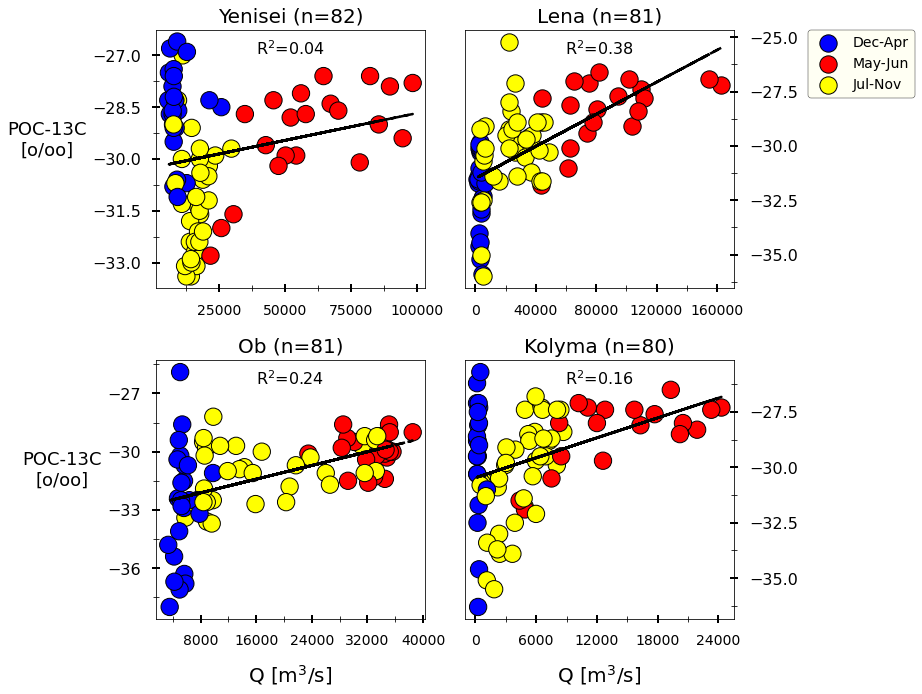

In [42]:
df_dfo = pd.DataFrame()
df_dfo['POC-13C'] = dfo['POC-13C']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['POC-13C'] = dfy['POC-13C']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['POC-13C'] = dfl['POC-13C']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['POC-13C'] = dfk['POC-13C']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['POC-13C'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['POC-13C'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['POC-13C'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['POC-13C'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['POC-13C'].mean())**2) / np.sum((df_dfo['POC-13C'] - df_dfo['POC-13C'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['POC-13C'].mean())**2) / np.sum((df_dfy['POC-13C'] - df_dfy['POC-13C'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['POC-13C'].mean())**2) / np.sum((df_dfl['POC-13C'] - df_dfl['POC-13C'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['POC-13C'].mean())**2) / np.sum((df_dfk['POC-13C'] - df_dfk['POC-13C'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['POC-13C'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['POC-13C'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['POC-13C'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['POC-13C'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'POC-13C'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Q [m$^3$/s]', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('POC-13C\n[o/oo]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('POC-13C\n[o/oo]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.5, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.5, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.5, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.5, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_POC_13C_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

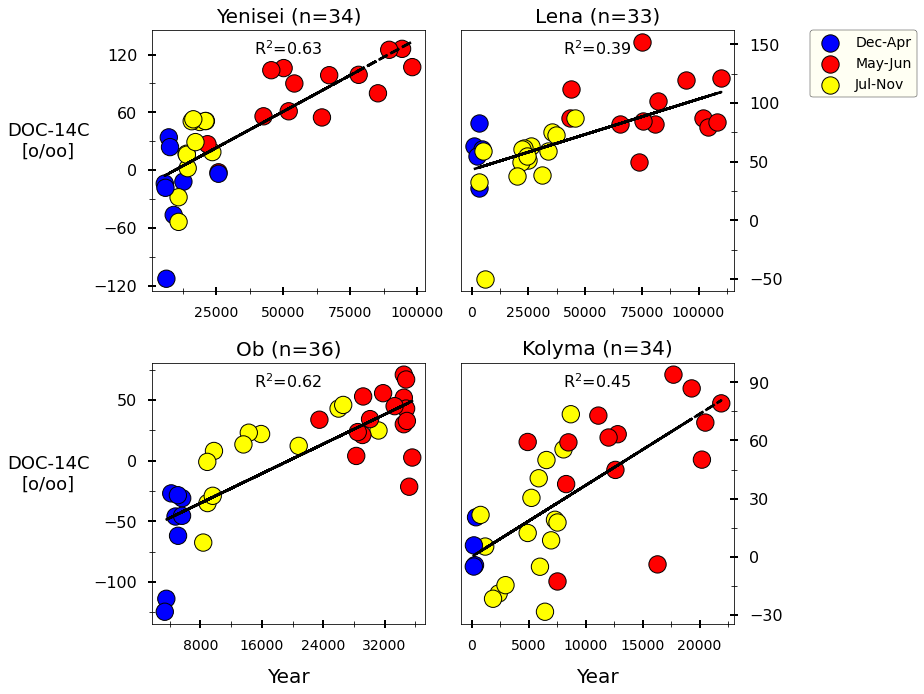

In [43]:
df_dfo = pd.DataFrame()
df_dfo['DOC-14C'] = dfo['DOC-14C']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['DOC-14C'] = dfy['DOC-14C']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['DOC-14C'] = dfl['DOC-14C']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['DOC-14C'] = dfk['DOC-14C']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['DOC-14C'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['DOC-14C'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['DOC-14C'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['DOC-14C'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['DOC-14C'].mean())**2) / np.sum((df_dfo['DOC-14C'] - df_dfo['DOC-14C'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['DOC-14C'].mean())**2) / np.sum((df_dfy['DOC-14C'] - df_dfy['DOC-14C'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['DOC-14C'].mean())**2) / np.sum((df_dfl['DOC-14C'] - df_dfl['DOC-14C'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['DOC-14C'].mean())**2) / np.sum((df_dfk['DOC-14C'] - df_dfk['DOC-14C'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['DOC-14C'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['DOC-14C'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['DOC-14C'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['DOC-14C'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'DOC-14C'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Year', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Year', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('DOC-14C\n[o/oo]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('DOC-14C\n[o/oo]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.5, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.5, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.5, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.5, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_DOC_14C_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

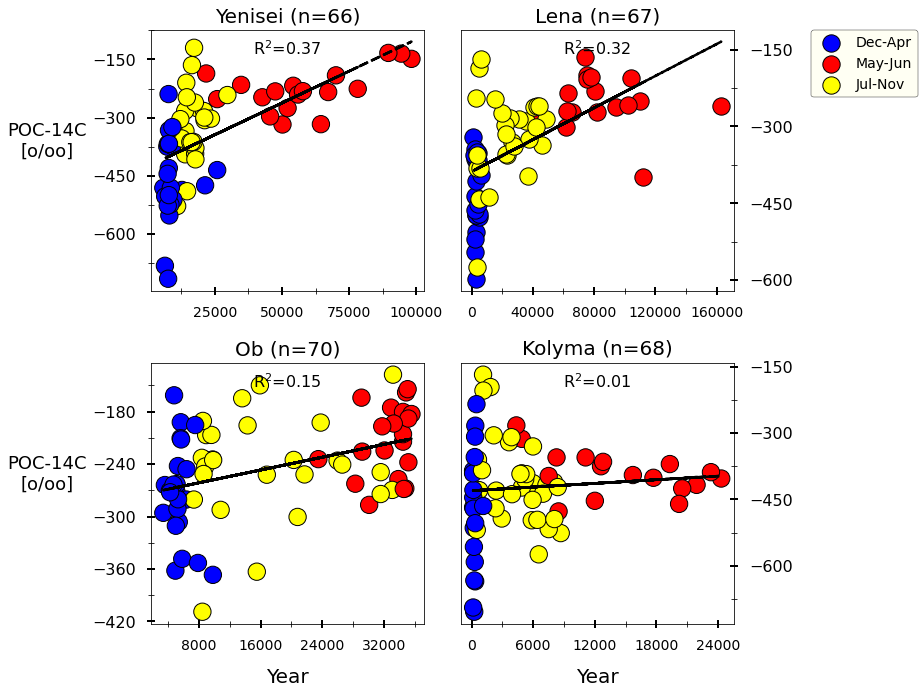

In [44]:
df_dfo = pd.DataFrame()
df_dfo['POC-14C'] = dfo['POC-14C']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['POC-14C'] = dfy['POC-14C']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['POC-14C'] = dfl['POC-14C']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['POC-14C'] = dfk['POC-14C']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['POC-14C'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['POC-14C'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['POC-14C'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['POC-14C'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['POC-14C'].mean())**2) / np.sum((df_dfo['POC-14C'] - df_dfo['POC-14C'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['POC-14C'].mean())**2) / np.sum((df_dfy['POC-14C'] - df_dfy['POC-14C'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['POC-14C'].mean())**2) / np.sum((df_dfl['POC-14C'] - df_dfl['POC-14C'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['POC-14C'].mean())**2) / np.sum((df_dfk['POC-14C'] - df_dfk['POC-14C'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['POC-14C'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['POC-14C'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['POC-14C'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['POC-14C'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'POC-14C'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Year', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Year', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('POC-14C\n[o/oo]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('POC-14C\n[o/oo]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.5, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.5, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.5, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.5, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_POC_14C_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')

In [45]:
dfo.columns

Index(['oq_m3/s', 'River', 'Date', 'T', 'pH', 'Cond', 'Alk', 'a254', 'a375',
       'a412', 'a420', 'a440', 'H2O-2H', 'H2O-18O', 'DOC', 'DOC-13C',
       'DOC-14C', 'DOC-fm', 'TDN', 'NO3', 'NH4', 'TDP', 'PO4', 'SiO2', 'Na',
       'K', 'Mg', 'Ca', 'As', 'Ba', 'Cl', 'SO4', 'Li', 'Rb', 'Sr', 'U', 'F',
       'UTHg', 'UMeHg', 'TSS', 'POC', 'POC-13C', 'POC-14C', 'POC-fm', 'PON',
       'PON-15N', 'Sample_depth_1', 'TSS_1', 'POC_1', 'POC-13C_1', 'PON_1',
       'PON-15N_1', 'Sample_depth_2', 'TSS_2', 'POC_2', 'POC-13C_2', 'PON_2',
       'PON-15N_2', 'year', 'month', 'day', 'month_day', 'month_', 'TOC', 'NP',
       'DOC_POC', 'camg_alk', 'camg_so4', 'camg_no3', 'acid_alk', 'Alk_uM',
       'season'],
      dtype='object')

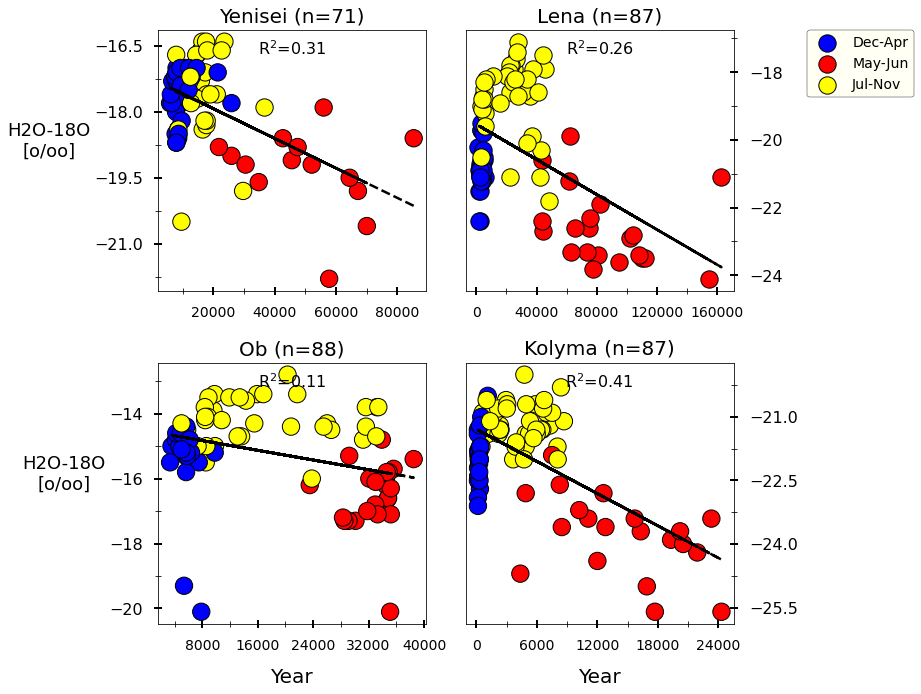

In [46]:
df_dfo = pd.DataFrame()
df_dfo['H2O-18O'] = dfo['H2O-18O']
df_dfo['oq_m3/s'] = dfo['oq_m3/s'] 
df_dfo.index = df_dfo['oq_m3/s'] 
df_dfo['oq_m3/s']  = df_dfo.index
df_dfo= df_dfo.dropna()

df_dfy = pd.DataFrame()
df_dfy['H2O-18O'] = dfy['H2O-18O']
df_dfy['yq_m3/s']  = dfy['yq_m3/s'] 
df_dfy.index = df_dfy['yq_m3/s'] 
df_dfy['yq_m3/s']  = df_dfy.index
df_dfy = df_dfy.dropna()

df_dfl = pd.DataFrame()
df_dfl['H2O-18O'] = dfl['H2O-18O']
df_dfl['lq_m3/s'] = dfl['lq_m3/s'] 
df_dfl.index = df_dfl['lq_m3/s'] 
df_dfl['lq_m3/s']  = df_dfl.index
df_dfl = df_dfl.dropna()

df_dfk = pd.DataFrame()
df_dfk['H2O-18O'] = dfk['H2O-18O']
df_dfk['kq_m3/s'] = dfk['kq_m3/s'] 
df_dfk.index = df_dfk['kq_m3/s'] 
df_dfk['kq_m3/s']  = df_dfk.index
df_dfk = df_dfk.dropna()

# Regression Equation
def model(x,a,b):
    return (a*x + b)

# Perform Model Fitting using Curve_Fit from SciPy.
p_opt_dfo, p_cov_dfo = curve_fit(f=model, xdata=df_dfo['oq_m3/s'], ydata=df_dfo['H2O-18O'])
p_opt_dfy, p_cov_dfy = curve_fit(f=model, xdata=df_dfy['yq_m3/s'], ydata=df_dfy['H2O-18O'])
p_opt_dfl, p_cov_dfl = curve_fit(f=model, xdata=df_dfl['lq_m3/s'], ydata=df_dfl['H2O-18O'])
p_opt_dfk, p_cov_dfk = curve_fit(f=model, xdata=df_dfk['kq_m3/s'], ydata=df_dfk['H2O-18O'])

# Optimal Coefficients
a_opt_dfo, b_opt_dfo = p_opt_dfo
a_opt_dfy, b_opt_dfy = p_opt_dfy
a_opt_dfl, b_opt_dfl = p_opt_dfl
a_opt_dfk, b_opt_dfk = p_opt_dfk

# Calculate Standard Deviation (SD)
p_err_dfo = np.sqrt(np.diag(p_cov_dfo))
p_err_dfy = np.sqrt(np.diag(p_cov_dfy))
p_err_dfl = np.sqrt(np.diag(p_cov_dfl))
p_err_dfk = np.sqrt(np.diag(p_cov_dfk))

# Name Standard Deviation (SD) for Coefficients
d_a_dfo, d_b_dfo = p_err_dfo
d_a_dfy, d_b_dfy = p_err_dfy
d_a_dfl, d_b_dfl = p_err_dfl
d_a_dfk, d_b_dfk = p_err_dfk

# Compute R-Squared Value (R2_df), Mean (μ_df), RMSE (rmse), and Number of Samples (n)
R2_dfo = np.sum((model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo) - df_dfo['H2O-18O'].mean())**2) / np.sum((df_dfo['H2O-18O'] - df_dfo['H2O-18O'].mean())**2)
R2_dfy = np.sum((model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy) - df_dfy['H2O-18O'].mean())**2) / np.sum((df_dfy['H2O-18O'] - df_dfy['H2O-18O'].mean())**2)
R2_dfl = np.sum((model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl) - df_dfl['H2O-18O'].mean())**2) / np.sum((df_dfl['H2O-18O'] - df_dfl['H2O-18O'].mean())**2)
R2_dfk = np.sum((model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk) - df_dfk['H2O-18O'].mean())**2) / np.sum((df_dfk['H2O-18O'] - df_dfk['H2O-18O'].mean())**2)

# Add Modeled values back into the DataFrame
df_dfo['model'] = model(df_dfo['oq_m3/s'], a_opt_dfo, b_opt_dfo)
df_dfy['model'] = model(df_dfy['yq_m3/s'], a_opt_dfy, b_opt_dfy)  
df_dfl['model'] = model(df_dfl['lq_m3/s'], a_opt_dfl, b_opt_dfl)  
df_dfk['model'] = model(df_dfk['kq_m3/s'], a_opt_dfk, b_opt_dfk)  

########################################################### Plot ###################################################################
fig, ax = plt.subplots(2,2,figsize=(14,10))

ax[0,0].set_title(f'Yenisei (n={df_dfy.shape[0]})', fontsize=20, c='black', pad=8)
ax[0,1].set_title(f'Lena (n={df_dfl.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,0].set_title(f'Ob (n={df_dfo.shape[0]})', fontsize=20, c='black', pad=8)
ax[1,1].set_title(f'Kolyma (n={df_dfk.shape[0]})', fontsize=20, c='black', pad=8)

ax[0,0].plot(df_dfy['yq_m3/s'], df_dfy['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[0,1].plot(df_dfl['lq_m3/s'], df_dfl['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,0].plot(df_dfo['oq_m3/s'], df_dfo['model'], c='black', lw=2.5, ls='--', zorder=3)
ax[1,1].plot(df_dfk['kq_m3/s'], df_dfk['model'], c='black', lw=2.5, ls='--', zorder=3)

ax[0,0].scatter(dfy['yq_m3/s'], dfy['H2O-18O'], c=dfy['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
#ax[0,1].scatter(dfl['lq_m3/s'], dfl['H2O-18O'], c=dfl['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,0].scatter(dfo['oq_m3/s'], dfo['H2O-18O'], c=dfo['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)
ax[1,1].scatter(dfk['kq_m3/s'], dfk['H2O-18O'], c=dfk['season'].map(colors), edgecolor='black', s=300, lw=1.0, ls='-', zorder=2)

for i in range(3):
    ax[0,1].scatter(dfl.loc[dfl['season'] == i, 'lq_m3/s'], dfl.loc[dfl['season'] == i, 'H2O-18O'],c=colors[i], edgecolor='black', lw=1.0, s=300, label=labels[i], zorder=2)
# Legend
ax[0,1].legend(loc=1, bbox_to_anchor=(1.7, 1.025), facecolor='ivory', edgecolor='black', fontsize=14)

# Labels (x)
ax[1,0].set_xlabel('Year', fontsize=20, c='black', labelpad=15)
ax[1,1].set_xlabel('Year', fontsize=20, c='black', labelpad=15)

# Labels (y)
ax[0,0].set_ylabel('H2O-18O\n[o/oo]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[1,0].set_ylabel('H2O-18O\n[o/oo]', fontsize=18, c='black', labelpad=45, rotation=0)
ax[0,1].yaxis.tick_right()
ax[1,1].yaxis.tick_right()
ax[0,1].yaxis.set_label_position("right")
ax[1,1].yaxis.set_label_position("right")

ax[0,0].text(0.5, 0.93, rf"R$^2$={R2_dfy:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,0].transAxes)
ax[0,1].text(0.5, 0.93, rf"R$^2$={R2_dfl:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[0,1].transAxes)
ax[1,0].text(0.5, 0.93, rf"R$^2$={R2_dfo:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,0].transAxes)
ax[1,1].text(0.5, 0.93, rf"R$^2$={R2_dfk:.2f}", fontsize=16, color='black',horizontalalignment='center',verticalalignment='center', transform=ax[1,1].transAxes)

for ax in ax.flat:
    ax.xaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.xaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=14, width=2)
    ax.xaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=14)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(2))
    ax.yaxis.set_tick_params(which='major', direction='inout',length=8,labelsize=16, width=2)
    ax.yaxis.set_tick_params(which='minor', direction='inout',length=6, labelsize=16)

#fig.suptitle('Siberian Rivers (2003-2021)', fontsize=32, x=0.58, y=1.005)

fig.tight_layout(pad=2)

fig.savefig('AGRO_Siberian_H2O_18O_DISCHARGE_Regression.png', dpi = 500, bbox_inches='tight')